# Chapter 8 Image Restoration

In [1]:
import jupyter_notebook
from Image_Processing.util import *

%matplotlib inline

importing Jupyter notebook from /home/nbuser/library/Image_Processing/util.ipynb


## 8.2 Noise

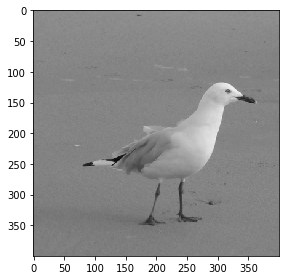

In [2]:
g = rgb2gray(imread("gull.png"))
imshow(g)

### Salt and Pepper Noise

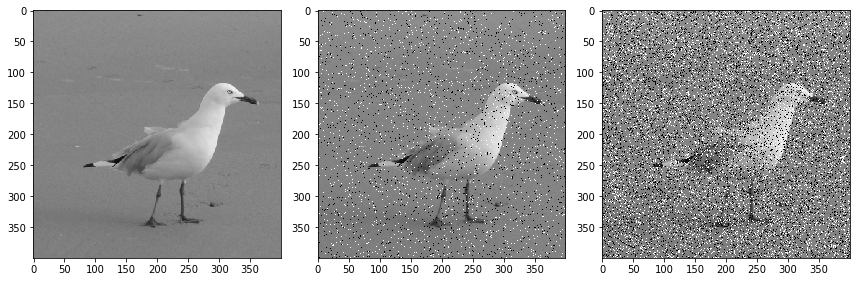

In [3]:
gsp = random_noise(g, mode="s&p") # Default: 0.05
gsp2 = random_noise(g, mode="s&p", amount=0.2)
matplot([g, gsp, gsp2])

### Gaussian, Speckle Noise

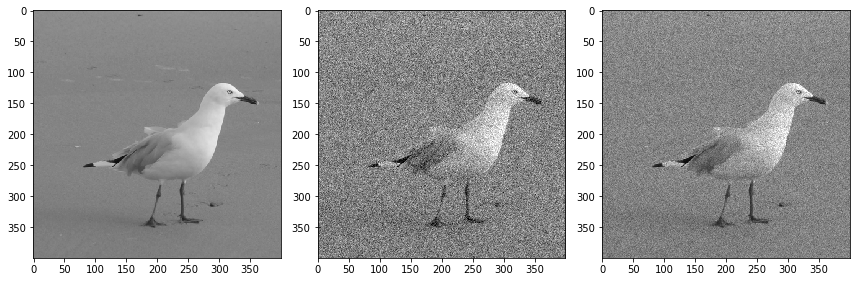

In [4]:
gg = random_noise(g, "gaussian") # mean=0, var=0.01
gs = random_noise(g, "speckle")
matplot([g, gg, gs])

### Periodic Noise

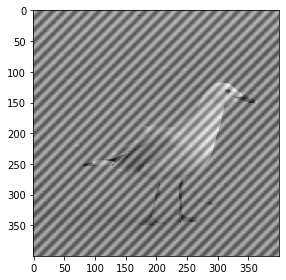

In [5]:
gp = periodic_noise(g)
imshow(gp)

## 8.3 Cleaning Salt and Pepper Noise

### Low Pass Filtering

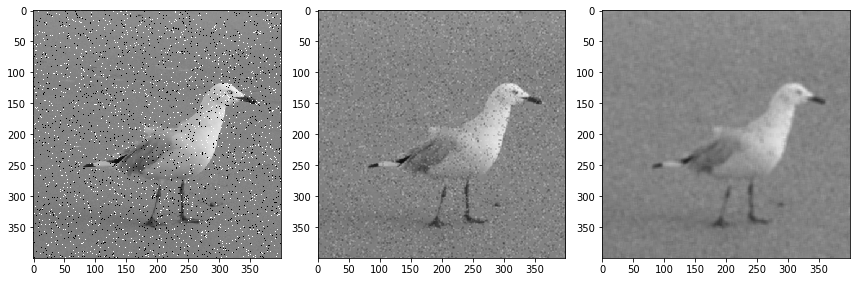

In [6]:
gsp_average_3 = uniform_filter(gsp, 3)
gsp_average_7 = uniform_filter(gsp, 7)
matplot([gsp, gsp_average_3, gsp_average_7])

### Median Filtering

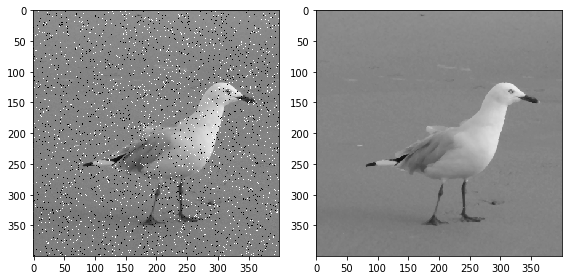

In [7]:
gsp_median_3 = median_filter(gsp, 3)
matplot([gsp, gsp_median_3])

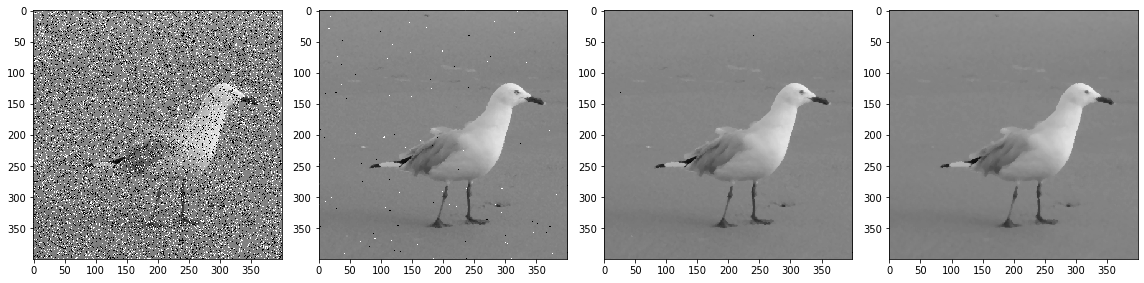

In [8]:
gsp2_median_3_1 = median_filter(gsp2, 3)
gsp2_median_3_2 = median_filter(gsp2_median_3_1, 3)
gsp2_median_5 = median_filter(gsp2, 5)
matplot([gsp2, gsp2_median_3_1, gsp2_median_3_2, gsp2_median_5])

### Rank-Order Filtering

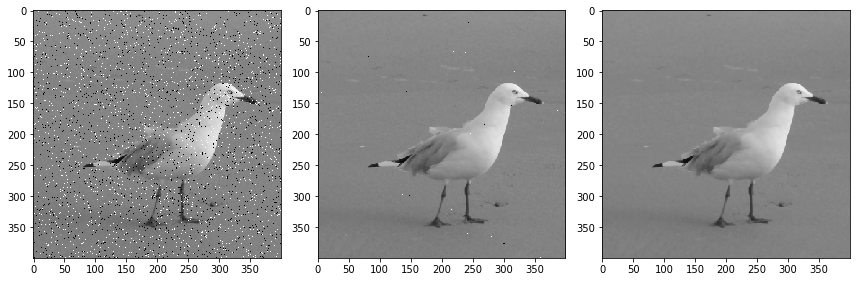

In [9]:
footprint_3 = array([[0, 1, 0], 
                     [1, 1, 1], 
                     [0, 1, 0]])
footprint_5 = array([[0, 0, 1, 0, 0], 
                     [0, 0, 1, 0, 0],
                     [1, 1, 1, 1, 1], 
                     [0, 0, 1, 0, 0], 
                     [0, 0, 1, 0, 0]])
gsp_rank_3 = median_filter(gsp, footprint=footprint_3)
gsp_rank_5 = median_filter(gsp, footprint=footprint_5)
matplot([gsp, gsp_rank_3, gsp_rank_5])

### An Outlier Method

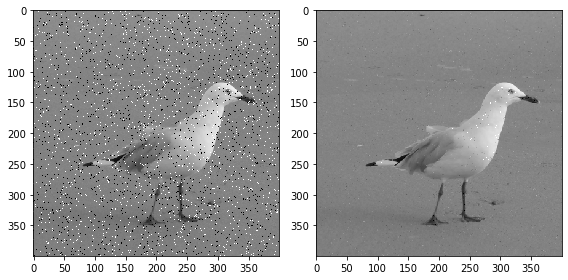

In [10]:
gsp_out = outlier_filter(gsp, 0.3)
matplot([gsp, gsp_out])

## 8.4 Cleaning Gaussian Noise

### Image Averaging

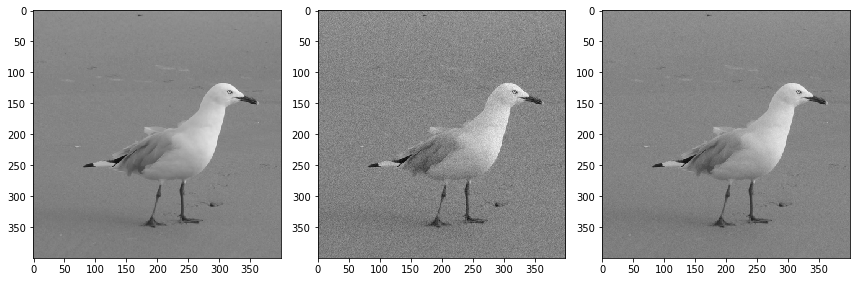

In [11]:
g_averaging_10 = image_average(g, 10)
g_averaging_100 = image_average(g, 100)
matplot([g, g_averaging_10, g_averaging_100])

### Average Filtering

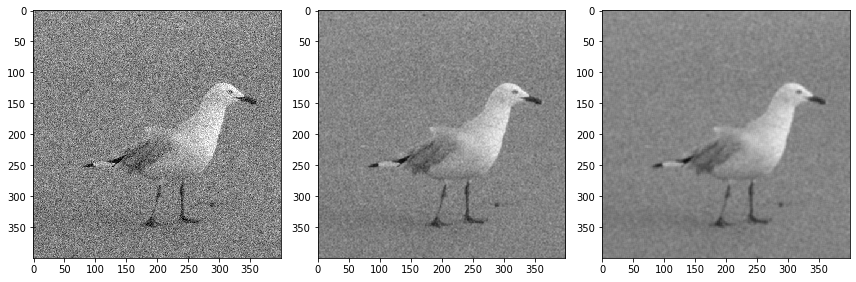

In [12]:
gg_average_3 = uniform_filter(gg, 3)
gg_average_5 = uniform_filter(gg, 5)
matplot([gg, gg_average_3, gg_average_5])

### Adaptive Filtering

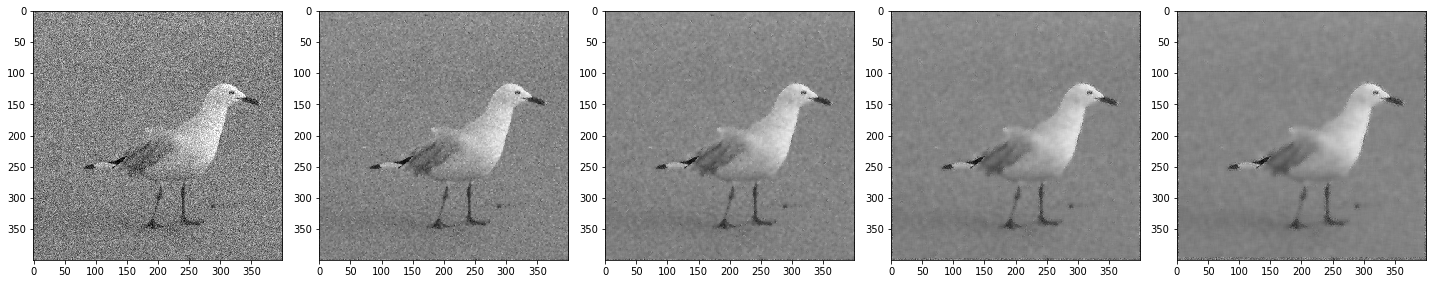

In [13]:
gg_wiener_3 = wiener(gg, 3)
gg_wiener_5 = wiener(gg, 5)
gg_wiener_7 = wiener(gg, 7)
gg_wiener_9 = wiener(gg, 9)
matplot([gg, gg_wiener_3, gg_wiener_5, gg_wiener_7, gg_wiener_9])

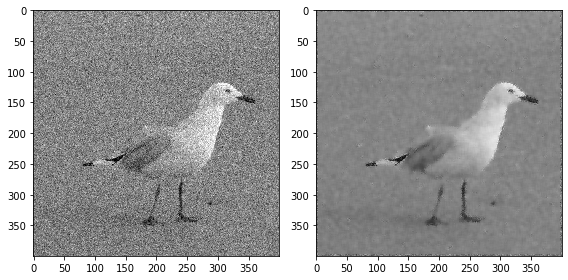

In [14]:
gg2 = random_noise(g, "gaussian", 0, 0.005)
gg2_wiener_7 = wiener(gg2, 7)
matplot([gg2, gg2_wiener_7])

## 8.5 Removal of Periodic Noise

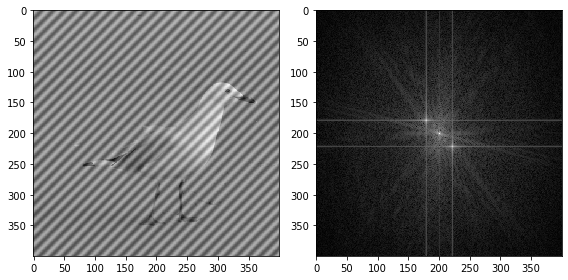

In [15]:
gf = fftshift(fft2(gp))
matplot([gp,fftshow(gf)])

In [16]:
gf2 = img_as_ubyte(fftshow(gf, "abs"))
gf2[200, 200] = 0
x, y = np.where(gf2 == gf2.max())
x, y, gf2.max()

(array([179, 221]), array([179, 221]), 35)

In [17]:
(x - 200) ** 2 + (y - 200) ** 2

array([882, 882])

### Band reject filtering

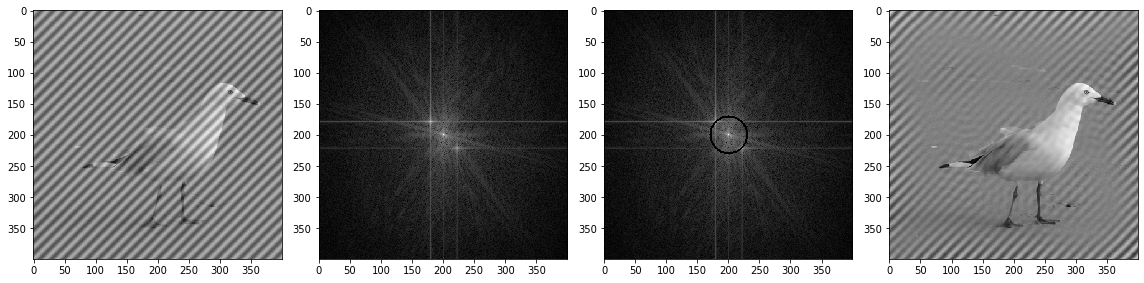

In [18]:
gpf, gpfbr, gpfbri = periodic_filter(gp, "band", 1)
matplot([gp, gpf, gpfbr, gpfbri])

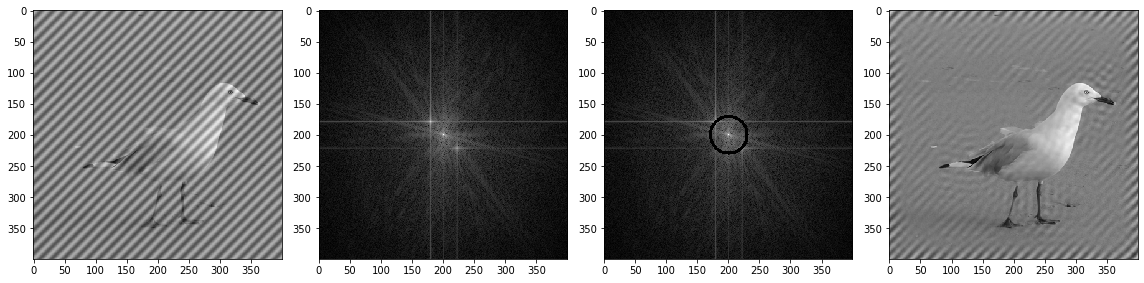

In [19]:
gpf, gpfbr, gpfbri = periodic_filter(gp, "band", 2)
matplot([gp, gpf, gpfbr, gpfbri])

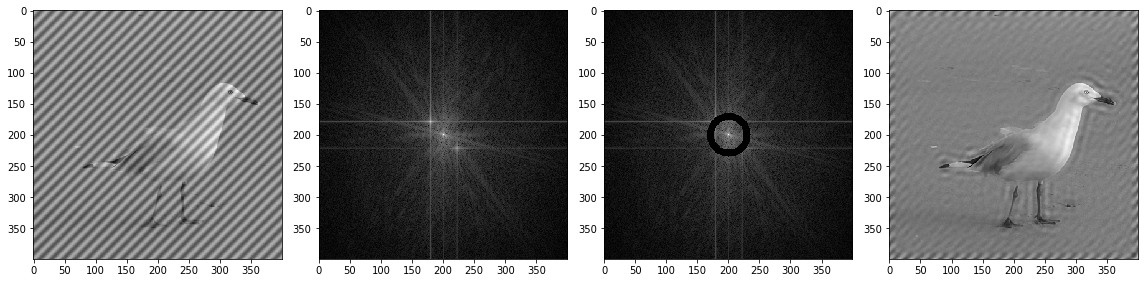

In [20]:
gpf, gpfbr, gpfbri = periodic_filter(gp, "band", 5)
matplot([gp, gpf, gpfbr, gpfbri])

### Criss-cross filtering

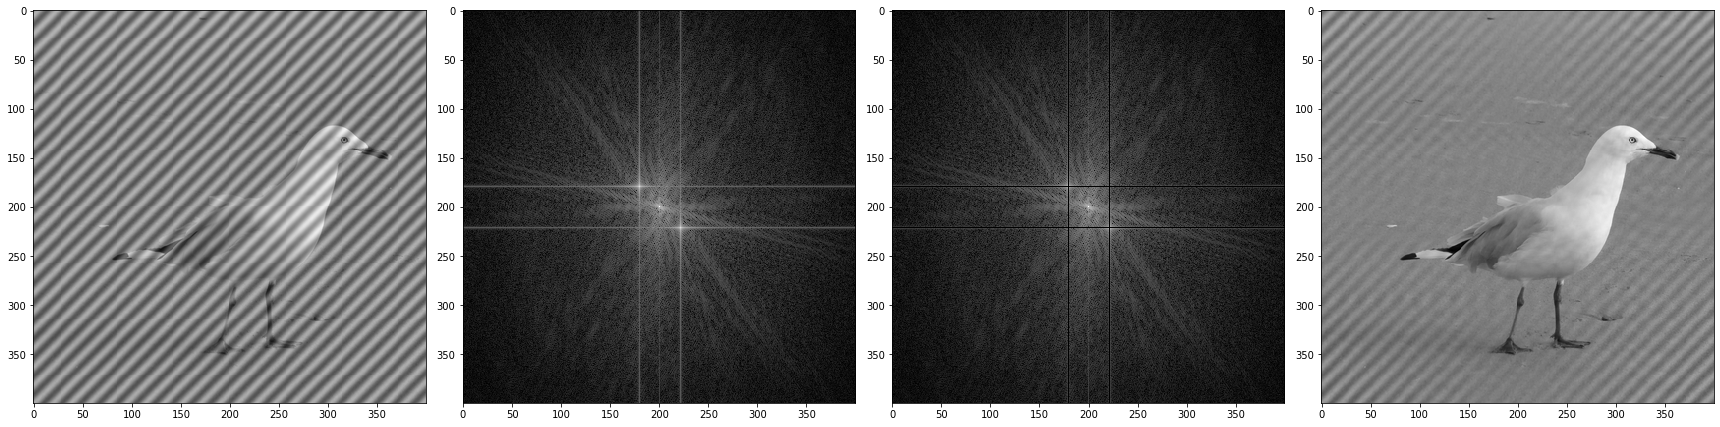

In [21]:
gf, gfc, gfci = periodic_filter(gp, "criss")
matplot([gp, fftshow(gf), fftshow(gfc), fftshow(gfci, "abs")], figsize=(24, 24))

## 8.6 Inverse

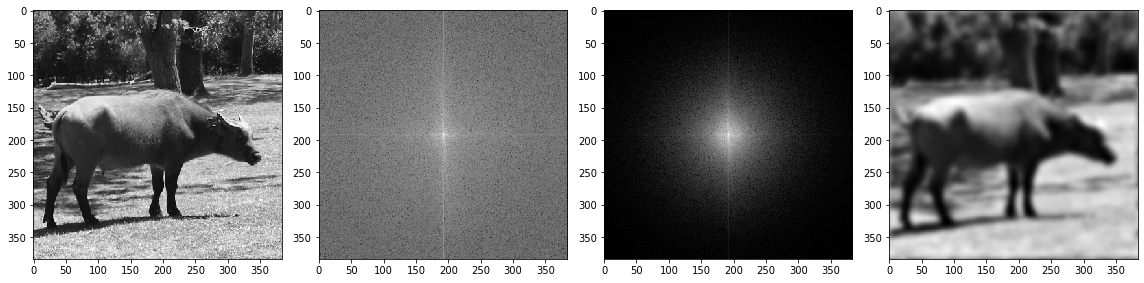

In [69]:
b = imread("buffalo.png")
bf, c, bfc, bfci = fft_filter(b, "butterworth", "low", 15, 2)
matplot([b, bf, bfc, bfci])

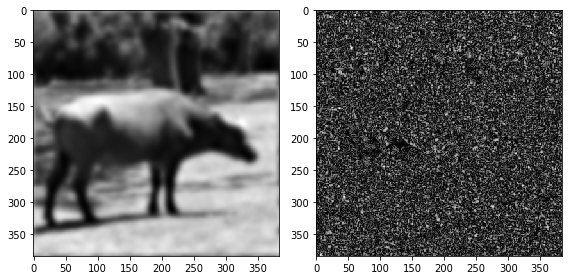

In [70]:
blf = fftshift(fft2(img_as_ubyte(bfci)))
blfw = blf / c
bla = ifft2(blfw)
matplot([bfci, fftshow(bla, "abs")])

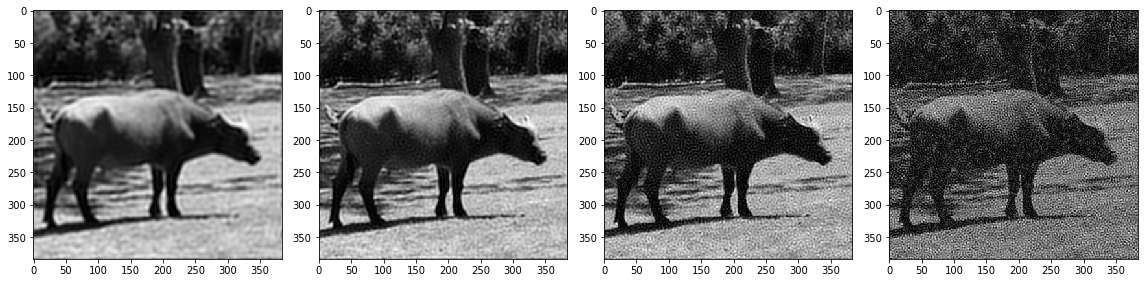

In [72]:
c40, bfcii40 = fft_inverse(bfci, c, "low", 40, 10)
c60, bfcii60 = fft_inverse(bfci, c, "low", 60, 10)
c80, bfcii80 = fft_inverse(bfci, c, "low", 80, 10)
c100, bfcii100 = fft_inverse(bfci, c, "low", 100, 10)
matplot([bfcii40, bfcii60, bfcii80, bfcii100])

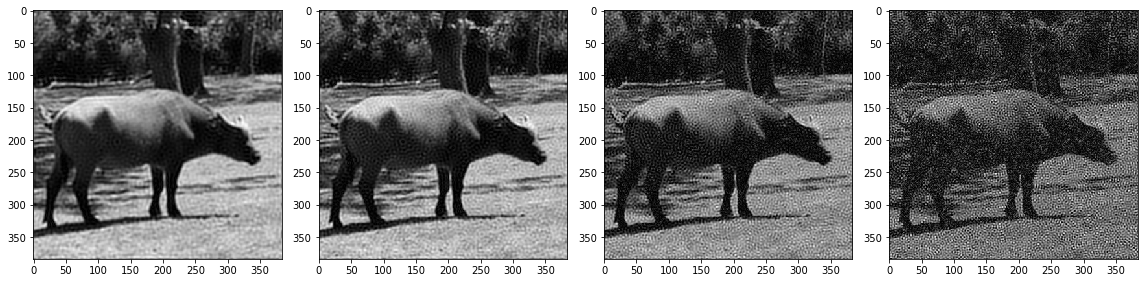

In [73]:
c40, bfcii40 = fft_inverse(bfci, c, "con", d=0.01)
c60, bfcii60 = fft_inverse(bfci, c, "con", d=0.005)
c80, bfcii80 = fft_inverse(bfci, c, "con", d=0.002)
c100, bfcii100 = fft_inverse(bfci, c, "con", d=0.001)
matplot([bfcii40, bfcii60, bfcii80, bfcii100])

### Motion Deblurring

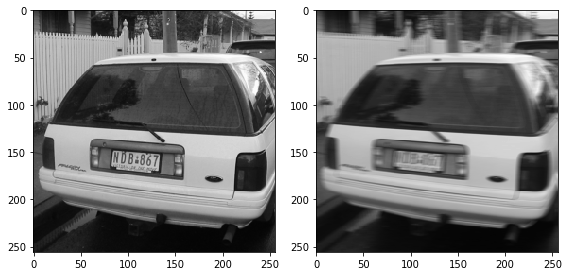

In [117]:
cr = imread("car.png")
m = ones((1, 7)) / 7
cm = convolve(cr, m)
matplot([cr, cm])

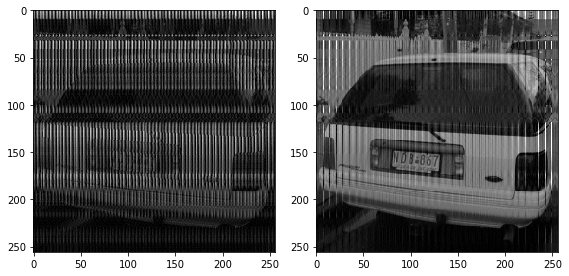

In [120]:
matplot([deblur(cm, m, "div"), deblur(cm, m, "con", 0.02)])